# Simulation IR vs experimental IR

Nowadays, there are a lot of research to try to simulate in the most accurate way. One of the approaches is by  using Density Functional Theory (DFT). However, due to the computational constrains and low accuracy of the models it is not possible yet to simulate an IR spectra which profile is exactly the same as a experimental spectra. 

The profile of the spectra refers to the shape and characteristics of the peaks observed in the spectrum. Here's a more detailed explanation of how the profile of the spectra differs between simulated DFT IR spectra and experimental IR spectra:

**Simulated DFT IR Spectra:**

- In simulated DFT IR spectra, the vibrational bands are typically sharper and narrower compared to experimental spectra.
DFT calculations consider a single isolated molecule in vacuum, without accounting for molecular interactions such as intermolecular forces or solvent effects. As a result, the vibrational modes are idealized and do not exhibit broadening effects due to interactions with neighboring molecules or the surrounding environment.
- The absence of broadening in DFT spectra means that individual vibrational modes are well-defined and separated, making it easier to assign specific peaks to corresponding molecular vibrations.
- However, it's important to note that while DFT calculations can accurately predict the frequencies and intensities of vibrational modes for isolated molecules, they may not fully capture the effects of molecular interactions present in a real experimental environment.

**Experimental IR Spectra:**

- Experimental IR spectra often exhibit broader and less defined peaks compared to simulated spectra.
- In experimental spectra, molecular interactions, such as intermolecular forces, hydrogen bonding, and solvent effects, can lead to broadening of vibrational bands.
- Broadening effects in experimental spectra result from interactions between molecules in the sample, leading to variations in vibrational frequencies and intensities compared to the idealized isolated molecule scenario assumed in DFT calculations.
- The broadening of peaks in experimental spectra can provide valuable information about molecular structure, conformational dynamics, and interactions within the sample.
- Additionally, experimental spectra may also exhibit baseline shifts, noise, and other artifacts that can affect the overall profile and interpretation of the spectrum.

In summary, the profile of the spectra in simulated DFT IR spectra is characterized by sharper and narrower peaks due to the idealized isolated molecule model, whereas experimental IR spectra often show broader and less defined peaks influenced by molecular interactions and experimental conditions. Understanding these differences is crucial for accurate interpretation and comparison of simulated and experimental IR spectra in chemical and materials research.

In [1]:
from axolotl_1 import IR_xTB, Animator_data, IR_axo
from pylab import *
import json
import glob
import pandas as pd

In [2]:
def LoadData(File):
    File_open=open(File)
    File_loaded = json.load(File_open)
    Dic = {"File": File,
           "wavenumbers"   : File_loaded['wavenumbers'],
           "intensities"  : File_loaded['intensities']
           }
    return Dic
def IR_exp(IR_data):
    name                = IR_data
    file                = pd.read_csv(name, delimiter='-',decimal=",")
    new_archive         = "{0}_2.csv".format(name[0:-4])
    headerList          = ['wavenumbers', 'intensities']
    file.to_csv(new_archive, header=headerList, index=False)
    file2               = pd.read_csv(new_archive) 
    file2.sort_values(by=['wavenumbers'], inplace=True)
    new_intensities     =[]
    for i in file2['intensities']:
        new_intensities.append(1-i)
    Dic = {"File": name,
           "wavenumbers"   : file2['wavenumbers'],
           "intensities"  : new_intensities
           }
    return Dic

def Normal(data):
    new_intensities = []
    old_intensities = data["intensities"]
    a               = max(old_intensities)
    for i in old_intensities:
        new_intensities.append(i/a)
    return new_intensities

# $H_2O$

In the case of the water ($H_2O$), the main difference is the broadening of the OH stretching between 3100 and 3600 $cm^{-1}$. This broadening is caused by the the hydrogen bonds that can act as dampers. 

In [3]:
glob.glob('./auxiliar/*.json')


['./auxiliar/response_1679660682243_POCl3_GFNFF.json',
 './auxiliar/response_1679610558006_CO2_GF2xTB.json',
 './auxiliar/response_1679659777727_POCl_3_GFN1xTB.json',
 './auxiliar/response_1679607003317_H2O_GFN1xTB.json',
 './auxiliar/response_1679611604838_CO2_GFNFF.json',
 './auxiliar/response_1679485961310_CS2_GFN2xTB.json',
 './auxiliar/response_1679614160476_Ben_GFN1xTB.json',
 './auxiliar/response_1679662928012_EtOH_GFN1xTB.json',
 './auxiliar/response_1679662150668_EtOH_GFNFF.json',
 './auxiliar/response_1679485578314_CS2_GFN1xTB.json',
 './auxiliar/response_1679663134619_EtOH_GFN2xTB.json',
 './auxiliar/response_1679660569925_POCl_3GFN2xTB.json',
 './auxiliar/response_1679611104569_CO2_GFN1xTB.json',
 './auxiliar/response_1679440595996_CS2_GFNFF.json',
 './auxiliar/EtOH_exp.json',
 './auxiliar/response_1679612847840_Ben_GFNFF.json',
 './auxiliar/response_1679613935215_Ben_GFN2xTB.json',
 './auxiliar/response_1679606406055_H2O_GFNFF.json',
 './auxiliar/response_1679607376257_H2O

In [4]:
File          ='./auxiliar/response_1679606406055_H2O_GFNFF.json'
H2_O_GFNFF    =LoadData(File)
File         ='./auxiliar/response_1679607003317_H2O_GFN1xTB.json'
H2_O_GFN1xTB =LoadData(File)
File         = './auxiliar/response_1679607376257_H2O_GFN2xTB.json'
H2_O_GFN2xTB =LoadData(File)
File         ='./auxiliar/H2_O_exp.csv'
H2_O_exp     = IR_exp(File)

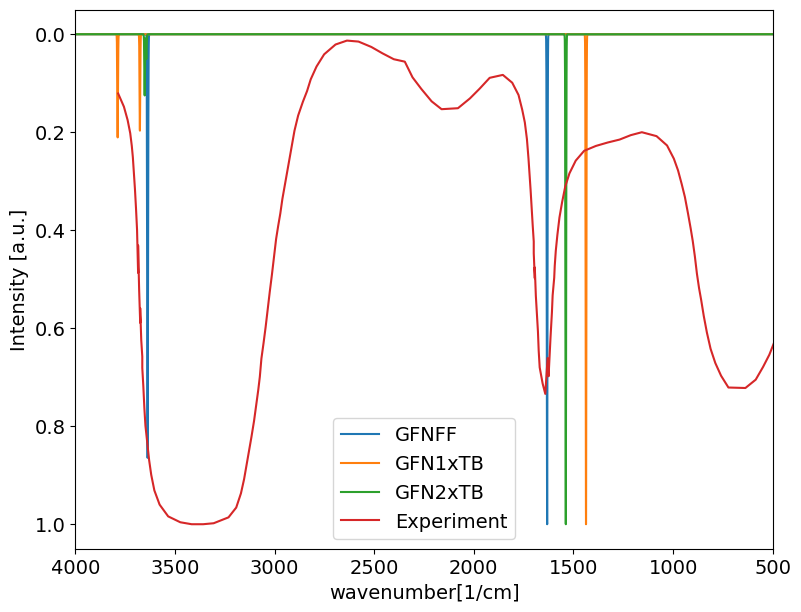

In [5]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(9,7))
    

ax.plot(H2_O_GFNFF['wavenumbers'],Normal(H2_O_GFNFF), label="GFNFF")
ax.plot(H2_O_GFN1xTB['wavenumbers'],Normal(H2_O_GFN1xTB), label="GFN1xTB")
ax.plot(H2_O_GFN2xTB['wavenumbers'],Normal(H2_O_GFN2xTB), label="GFN2xTB")
ax.plot(H2_O_exp['wavenumbers'],Normal(H2_O_exp), label="Experiment")
ax.legend()
ax.set_xlabel("wavenumber[1/cm]")
ax.set_ylabel("Intensity [a.u.]")
ax.set_xlim(500,4000)
ax.invert_yaxis()
ax.invert_xaxis()



# $CO_2$

In [6]:
File          ='./auxiliar/response_1679611604838_CO2_GFNFF.json'
CO_2_GFNFF    =LoadData(File)
File         ='./auxiliar/response_1679611104569_CO2_GFN1xTB.json'
CO_2_GFN1xTB =LoadData(File)
File         = './auxiliar/response_1679610558006_CO2_GF2xTB.json'
CO_2_GFN2xTB =LoadData(File)
File         ='./auxiliar/CO_2.csv'
CO_2_exp     = IR_exp(File)

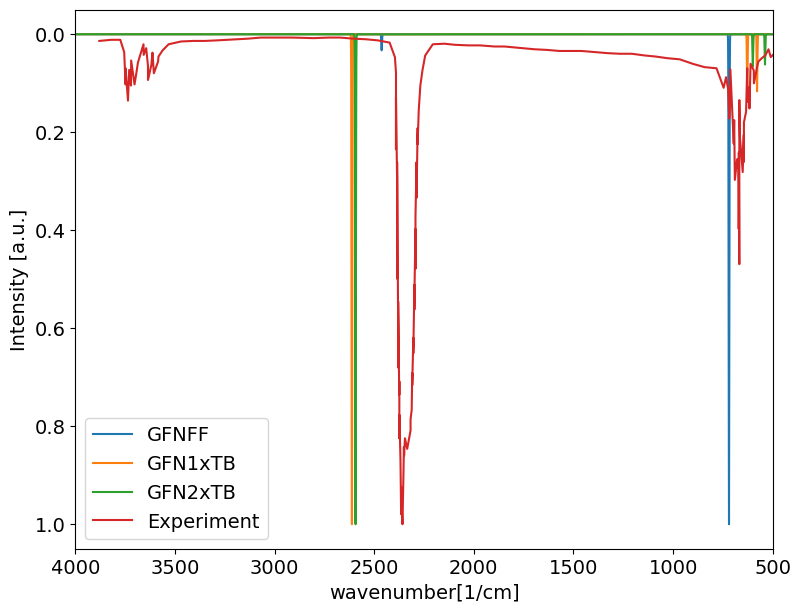

In [7]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(9,7))
    

ax.plot(CO_2_GFNFF['wavenumbers'],Normal(CO_2_GFNFF), label="GFNFF")
ax.plot(CO_2_GFN1xTB['wavenumbers'],Normal(CO_2_GFN1xTB), label="GFN1xTB")
ax.plot(CO_2_GFN2xTB['wavenumbers'],Normal(CO_2_GFN2xTB), label="GFN2xTB")
ax.plot(CO_2_exp['wavenumbers'],Normal(CO_2_exp), label="Experiment")
ax.legend()
ax.set_xlabel("wavenumber[1/cm]")
ax.set_ylabel("Intensity [a.u.]")
ax.set_xlim(500,4000)
ax.invert_yaxis()
ax.invert_xaxis()